# Phân tích dữ liệu covid19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from matplotlib.ticker import FuncFormatter 
import numpy as np
import geopandas as gdp

 Tải dữ liệu lên từ file 

In [ ]:
World_data=pd.read_csv(r'A:\UET-VNU\Project_covid19\Data\world_data.csv') # data thế giới
country_data=pd.read_csv(r'A:\UET-VNU\Project_covid19\Data\contries_data.csv')  # data quốc gia
df_territory = pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\country-codes.csv') # bản đồ thế giới
continent_data=pd.read_csv(r'A:\UET-VNU\Project_covid19\Data\continent_data.csv')   # data theo châu lục
gdp_data = pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\worldbank_data_g20_vietnam_2021_2022.csv') # gdp 2020-2021 Vietnam và g20
data_co2 = pd.read_csv(r"A:\UET-VNU\Project_covid19\Data\annual-co-emissions-by-region.csv") # dữ liệu co2 các châu lụclục

World_data['date'] = pd.to_datetime(world_data['date'])


# Tổng quan về tình hình dịch covid 19

## Biều đồ số ca nhiễm mới, tử vong mới , tiêm chủng mới theo thời gian

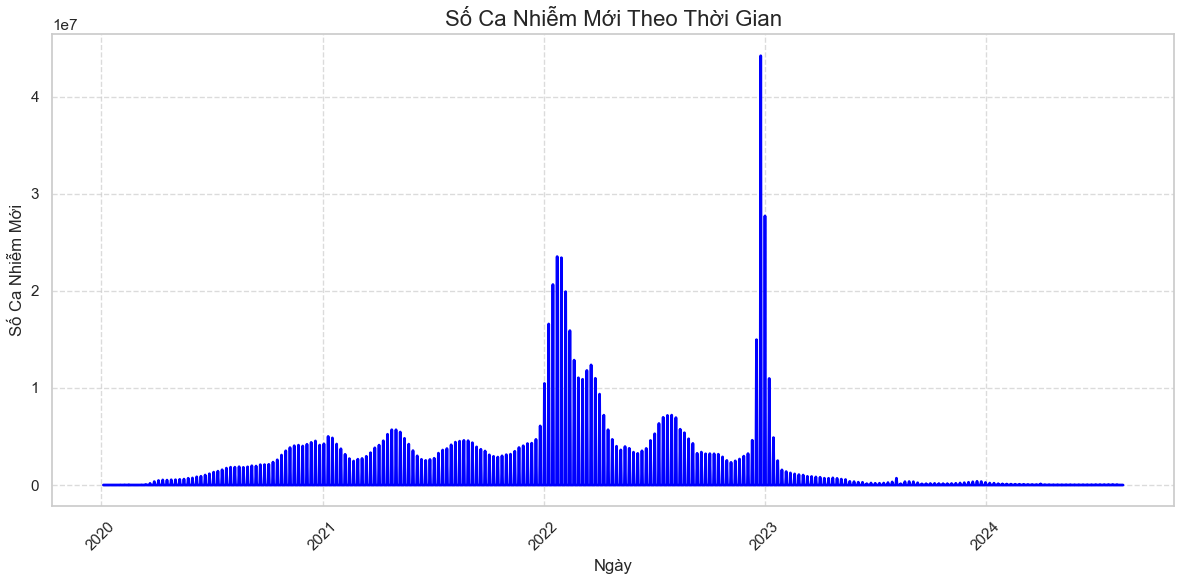

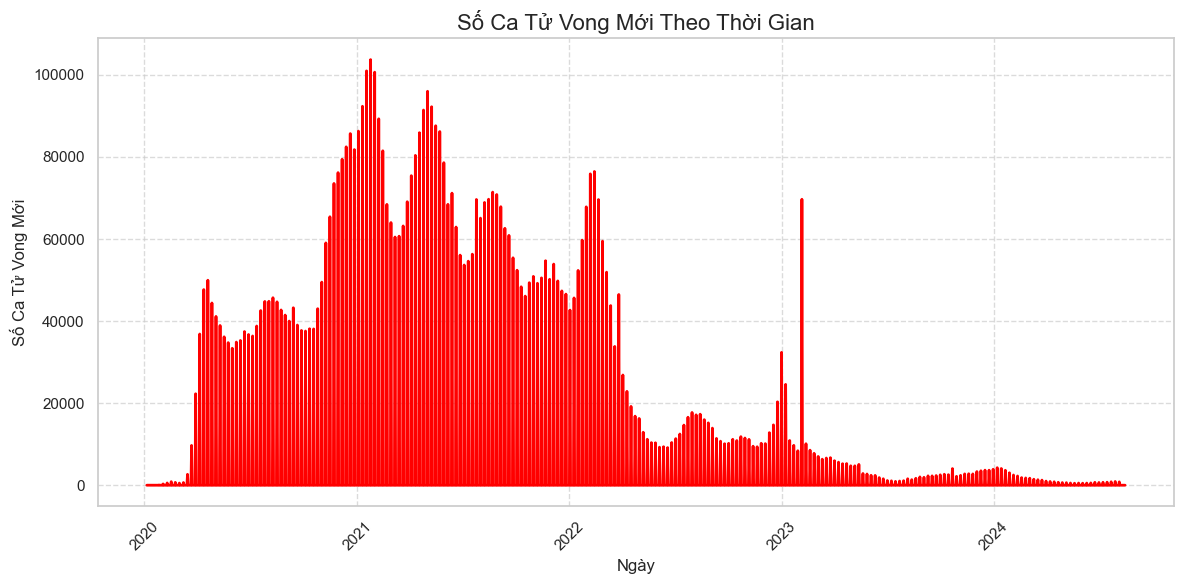

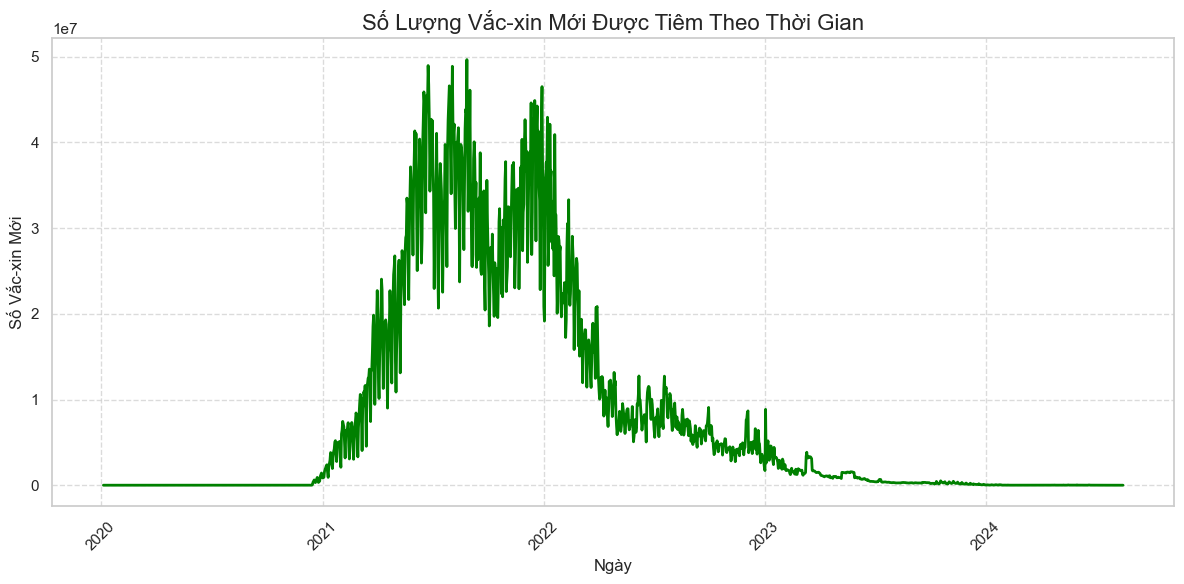

In [ ]:
# lọc dữ liệu
World_data['date'] = pd.to_datetime(World_data['date'])
cases_over_time = World_data.groupby('date')['new_cases'].sum().reset_index() 
deaths_over_time = World_data.groupby('date')['new_deaths'].sum().reset_index()  
vaccinations_over_time = World_data.groupby('date')['new_vaccinations'].sum().reset_index()

# Biểu đồ Số ca nhiễm mới theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', data=cases_over_time, color='blue', linewidth=2)  
plt.title('Số Ca Nhiễm Mới Theo Thời Gian', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Nhiễm Mới', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

# Biểu đồ số ca tử vong mới theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_deaths', data=deaths_over_time, color='red', linewidth=2)  
plt.title('Số Ca Tử Vong Mới Theo Thời Gian', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Tử Vong Mới', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

#   Bieểu đồ Số lượng vắc-xin mới được tiêm theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_vaccinations', data=vaccinations_over_time, color='green', linewidth=2)  
plt.title('Số Lượng Vắc-xin Mới Được Tiêm Theo Thời Gian', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Vắc-xin Mới', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()


## bản đồ heatmap nhiệt thế giới


### số ca nhiễm trên toàn cầu

In [93]:
# bản đồ số ca nhiễm trên toàn cầu 
# Tính tổng số ca nhiễm tối đa cho mỗi quốc gia và kết hợp dữ liệu với bản đò thế giới
df_cases = country_data.groupby('iso_code')['total_cases'].max().reset_index()
df_merged = df_cases.merge(df_territory, left_on='iso_code', right_on='ISO3166-1-Alpha-3', how='left')
fig = px.choropleth(df_merged,
                    locations='iso_code',
                    color='total_cases', 
                    hover_name='official_name_en',
                    color_continuous_scale='Reds',
                    title='Số ca nhiễm trên toàn cầu',
                    projection='natural earth')  

fig.update_layout(
    title_font_size=20,
    title_x=0.5,  # Căn giữa tiêu đề
    margin={"r":0,"t":50,"l":0,"b":0},  # Giảm khoảng trống xung quanh
    width=1200,  # Chiều rộng
    height=800   # Chiều cao
)

fig.show()


### số ca tử vong toàn cầu

In [94]:

# bản đồ số ca tử vong trên toàn cầu 
# Tính tổng số ca tử vong tối đa cho mỗi quốc gia và kết hợp dữ liệu với bản đò thế giới

df_deaths = country_data.groupby('iso_code')['total_deaths'].max().reset_index()
df_merged = df_deaths.merge(df_territory, left_on='iso_code', right_on='ISO3166-1-Alpha-3', how='left')
fig = px.choropleth(df_merged,
                    locations='iso_code',
                    color='total_deaths',
                    hover_name='official_name_en',
                    color_continuous_scale='Reds',
                    title='Số ca tử vong trên toàn cầu',
                    projection='natural earth') 
fig.update_layout(
    title_font_size=20,
    title_x=0.5,  # Căn giữa tiêu đề
    margin={"r":0,"t":50,"l":0,"b":0},  # Giảm khoảng trống xung quanh
    width=1200,  # Chiều rộng
    height=800   # Chiều cao
)

fig.show()


### hỗ trợ của chính phủ


In [95]:

# bản đồ số hỗ trợ của chính phủ  trên toàn cầu 
# Tính max số hỗ trợ của chính phủ cho mỗi quốc gia và kết hợp dữ liệu với bản đò thế giới

df_support=pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\sp.csv')

gov_support = df_support.groupby('Code')['e1_income_support'].max().reset_index()
df_merged = gov_support.merge(df_territory, left_on='Code', right_on='ISO3166-1-Alpha-3', how='left')

fig = px.choropleth(df_merged,
                    locations='Code',
                    color='e1_income_support',  
                    hover_name='official_name_en',
                    color_continuous_scale='Blues', 
                    title='Hỗ trợ của chính phủ',
                    projection='natural earth')  

fig.update_layout(coloraxis_colorbar=dict(
    title="Income Support",
    tickvals=[0, 1, 2],  
    ticktext=["0: không hỗ trợ", "1: hỗ trợ dưới 50% thu nhâp", "2: hỗ trợ trên 50% thu nhâp"]
))
fig.update_layout(
    title_font_size=20,
    title_x=0.5,  # Căn giữa tiêu đề
    margin={"r":0,"t":50,"l":0,"b":0},  # Giảm khoảng trống xung quanh
    width=1200,  # Chiều rộng
    height=800   # Chiều cao
)
fig.show()


## châu lục và quốc gia


### biểu đồ tròn tỉ lệ nhiễm và tử vong của các châu lục

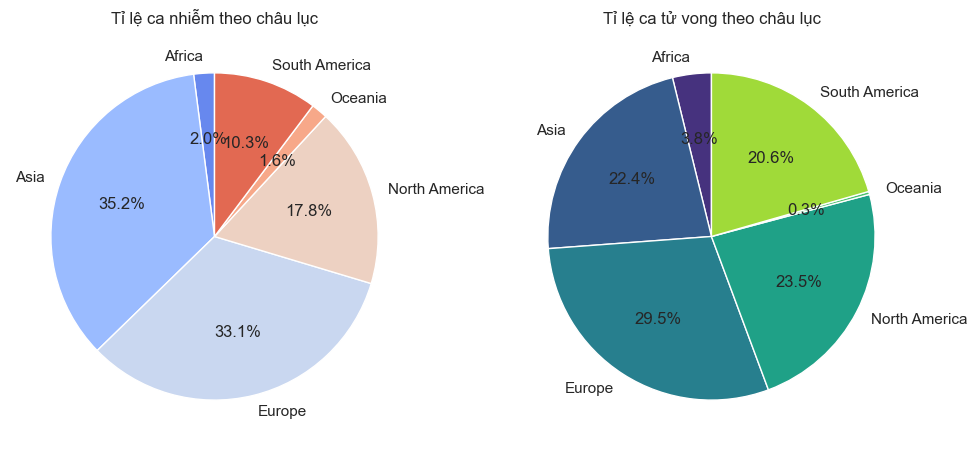

In [96]:
# biểu đồ tròn tỉ lệ nhiễm và tử vong của các châu lục
df_grouped = country_data.groupby('continent').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))

# Biểu đồ Tròn cho số ca nhiễm
plt.subplot(1, 2, 1)
plt.pie(df_grouped['total_cases'], labels=df_grouped['continent'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(df_grouped)))
plt.title('Tỉ lệ ca nhiễm theo châu lục')

# Biểu đồ Tròn cho số ca tử vong
plt.subplot(1, 2, 2)
plt.pie(df_grouped['total_deaths'], labels=df_grouped['continent'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df_grouped)))
plt.title('Tỉ lệ ca tử vong theo châu lục')
plt.tight_layout()
plt.show()




### các nước dẫn đầu về số ca nhiễm và tử vong

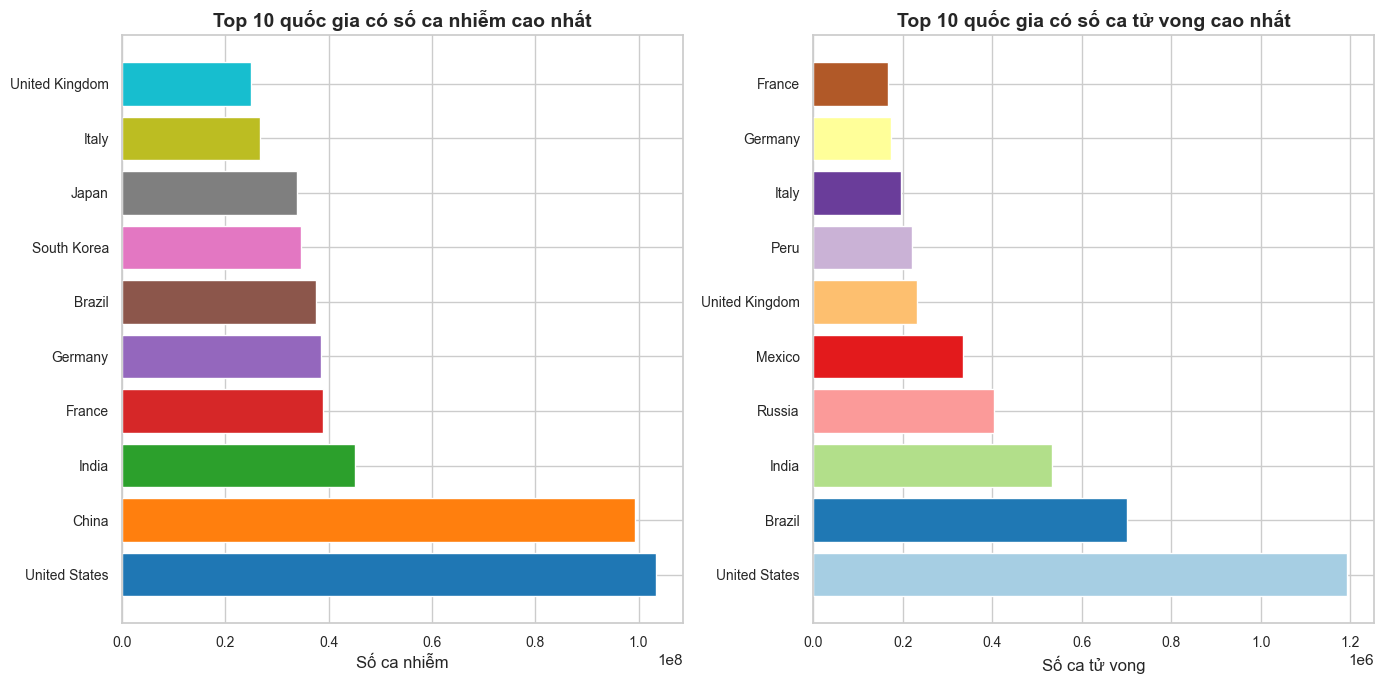

In [97]:
# các nước dẫn đầu về số ca nhiễm và tử vong

top_countries_cases = country_data.groupby('location')['total_cases'].max().nlargest(10)
top_countries_deaths = country_data.groupby('location')['total_deaths'].max().nlargest(10)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
case_colors = plt.cm.tab10(np.linspace(0, 1, len(top_countries_cases))) 
death_colors = plt.cm.Paired(np.linspace(0, 1, len(top_countries_deaths)))  

ax[0].barh(top_countries_cases.index, top_countries_cases.values, color=case_colors)
ax[0].set_title('Top 10 quốc gia có số ca nhiễm cao nhất', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Số ca nhiễm', fontsize=12)
ax[0].tick_params(axis='both', labelsize=10)

ax[1].barh(top_countries_deaths.index, top_countries_deaths.values, color=death_colors)
ax[1].set_title('Top 10 quốc gia có số ca tử vong cao nhất', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Số ca tử vong', fontsize=12)
ax[1].tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()


### biều đồ số ca nhiễm tử vong tiêm chủng của các châu lục

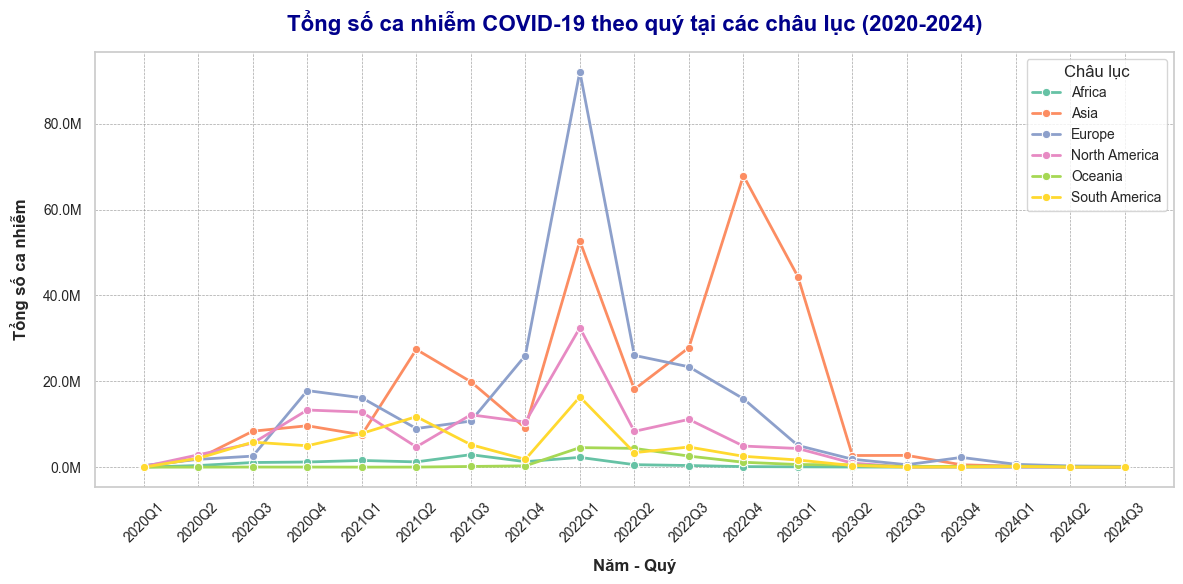

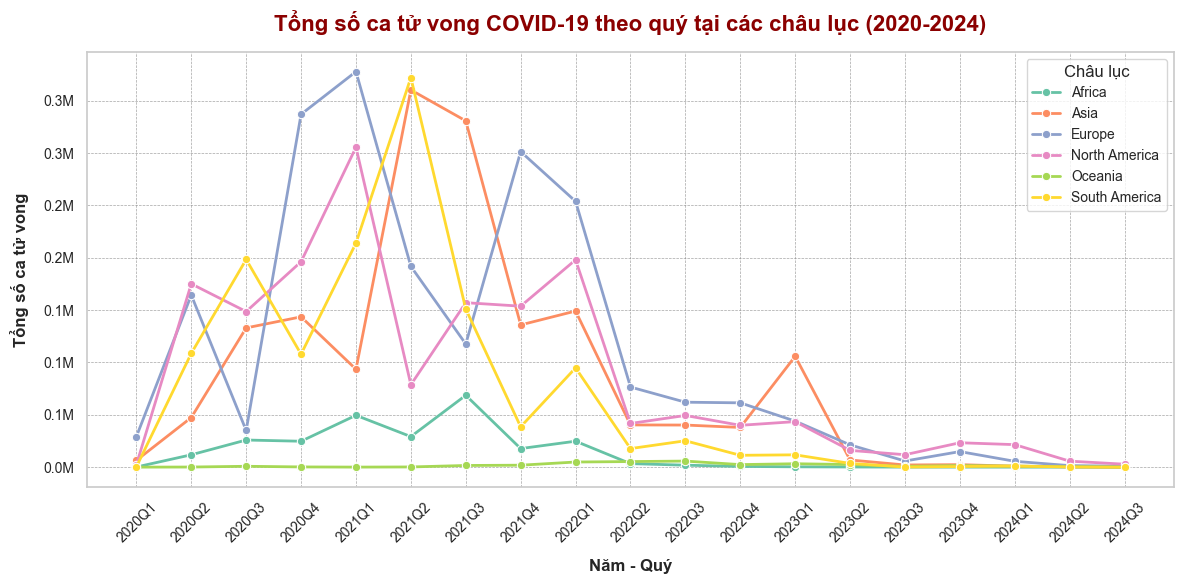

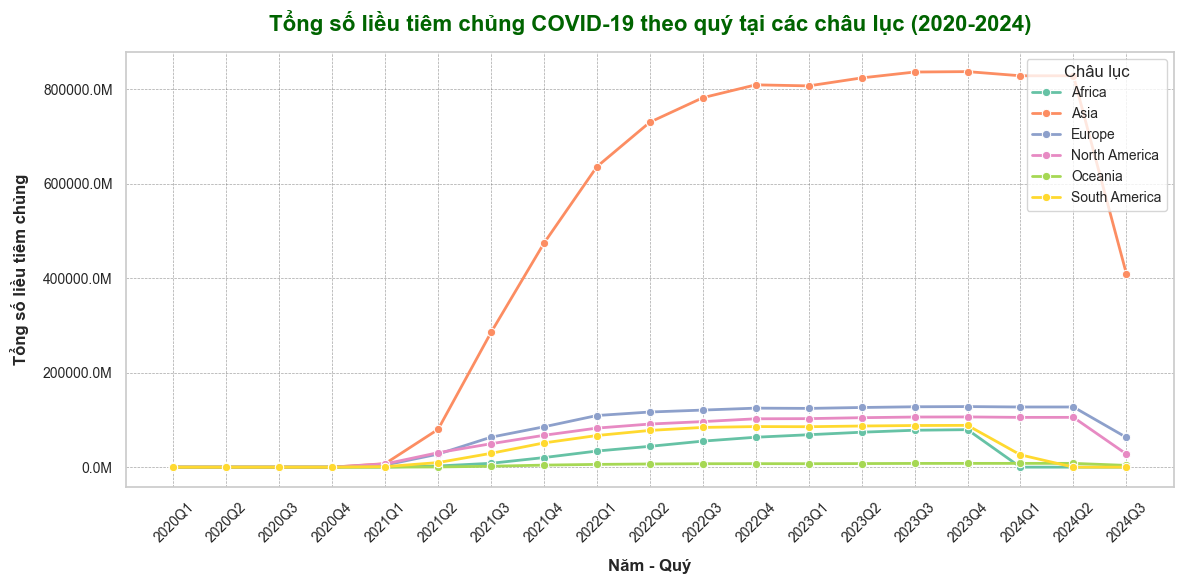

In [98]:

continent_data['date'] = pd.to_datetime(continent_data['date'])
continent_data['year_quarter'] = continent_data['date'].dt.to_period('Q')  # Tạo cột năm và quý
for col in ['new_cases', 'new_deaths', 'total_vaccinations']:
    continent_data[col] = continent_data[col].fillna(0)  

lst1 = ['new_cases', 'new_deaths', 'total_vaccinations']
quarterly_data = {}
for metric in lst1:
    quarterly_data[metric] = (
        continent_data.groupby(['location', 'year_quarter'])[metric]
        .sum()
        .reset_index()
        .assign(year_quarter=lambda df: df['year_quarter'].astype(str))  
    )

def plot_metric(data, metric, title, ylabel, color):
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=data, 
        x='year_quarter', 
        y=metric, 
        hue='location', 
        palette='Set2', 
        marker='o', 
        markersize=6, 
        linewidth=2,
    )
    plt.title(title, fontsize=16, fontweight="bold", color=color, pad=15)
    plt.xlabel("Năm - Quý", fontsize=12, labelpad=10, fontweight="bold")
    plt.ylabel(ylabel, fontsize=12, labelpad=10, fontweight="bold")
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')) 
    plt.tight_layout()
    plt.legend(title="Châu lục", loc="upper right", fontsize=10, title_fontsize=12, frameon=True)
    plt.show()
plot_metric(
    quarterly_data['new_cases'], 
    'new_cases', 
    "Tổng số ca nhiễm COVID-19 theo quý tại các châu lục (2020-2024)", 
    "Tổng số ca nhiễm", 
    "darkblue"
)

plot_metric(
    quarterly_data['new_deaths'], 
    'new_deaths', 
    "Tổng số ca tử vong COVID-19 theo quý tại các châu lục (2020-2024)", 
    "Tổng số ca tử vong", 
    "darkred"
)

plot_metric(
    quarterly_data['total_vaccinations'], 
    'total_vaccinations', 
    "Tổng số liều tiêm chủng COVID-19 theo quý tại các châu lục (2020-2024)", 
    "Tổng số liều tiêm chủng", 
    "darkgreen"
)


# Tương quan của các chỉ số

### Tương quan của ca nhiễm và tử vong

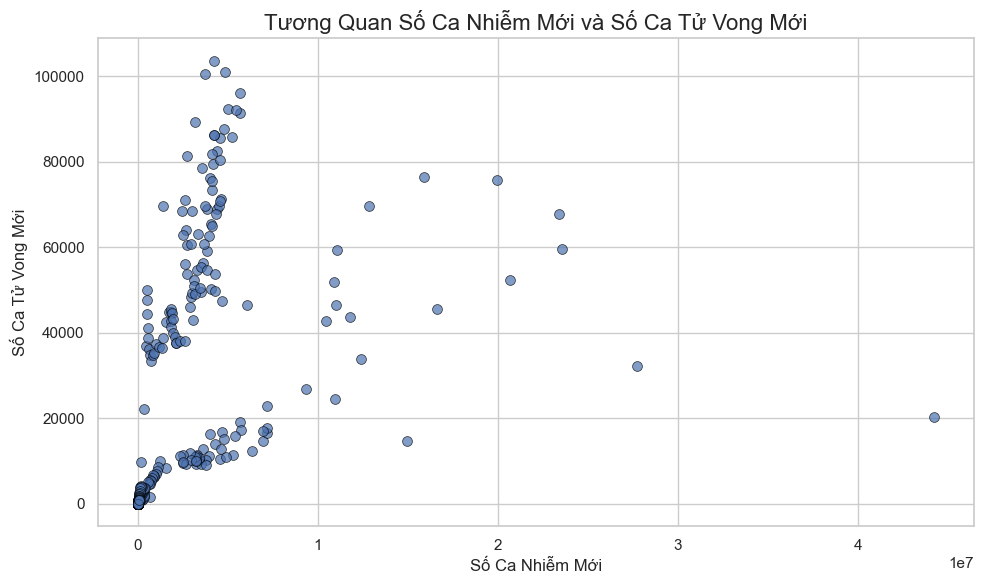

In [99]:
# -- biểu đồ tương quan ca nhiễm và tử vong
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=world_data,
    x='new_cases',
    y='new_deaths',
    alpha=0.7,  
    edgecolor='black', 
    s=50  
)


plt.title("Tương Quan Số Ca Nhiễm Mới và Số Ca Tử Vong Mới", fontsize=16)
plt.xlabel("Số Ca Nhiễm Mới", fontsize=12)
plt.ylabel("Số Ca Tử Vong Mới", fontsize=12)

plt.tight_layout()
plt.show()


### Tương quan của 2 biến chủng omicron và detal

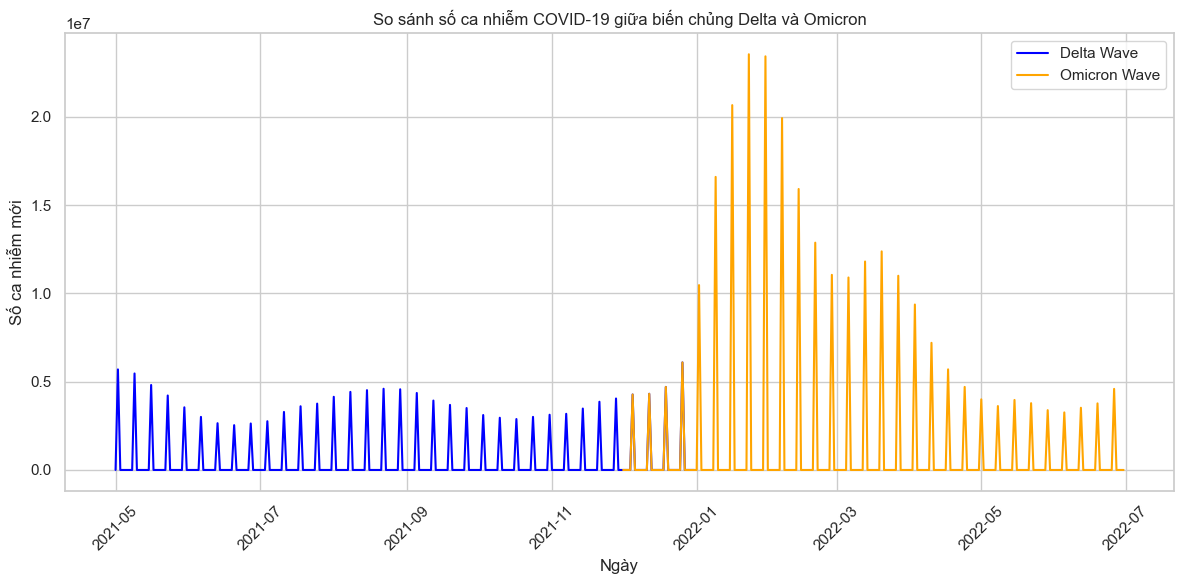

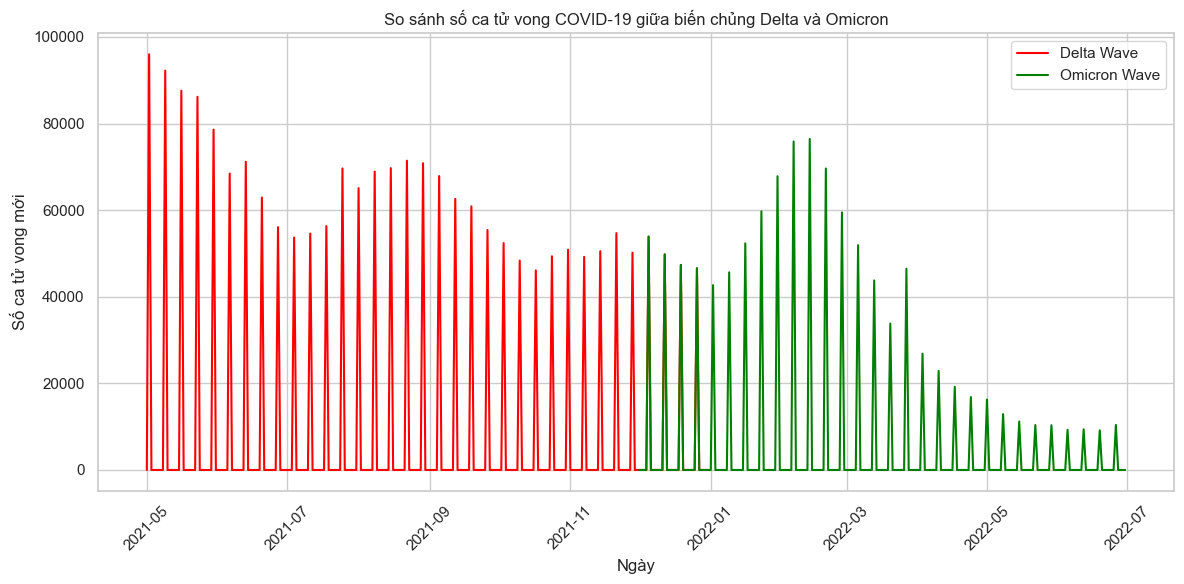

In [100]:
# so sánh biến chủng omicron và delta theo số ca tử vong và nhiễm
# Lọc dữ liệu cho biến chủng Delta (từ tháng 5/2021 đến tháng 12/2021)
delta_wave = World_data[(World_data['date'] >= '2021-05-01') & (World_data['date'] <= '2021-12-31')]
# Lọc dữ liệu cho biến chủng Omicron (từ tháng 12/2021 đến giữa năm 2022)
omicron_wave = World_data[(World_data['date'] >= '2021-12-01') & (World_data['date'] <= '2022-06-30')]

# So sánh số ca nhiễm COVID-19 giữa biến chủng Delta và Omicron 
plt.figure(figsize=(12, 6))
plt.plot(delta_wave['date'], delta_wave['new_cases'], label='Delta Wave', color='blue')
plt.plot(omicron_wave['date'], omicron_wave['new_cases'], label='Omicron Wave', color='orange')
plt.title('So sánh số ca nhiễm COVID-19 giữa biến chủng Delta và Omicron')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# So sánh số ca tử vong COVID-19 giữa biến chủng Delta và Omicron 
plt.figure(figsize=(12, 6))
plt.plot(delta_wave['date'], delta_wave['new_deaths'], label='Delta Wave', color='red')
plt.plot(omicron_wave['date'], omicron_wave['new_deaths'], label='Omicron Wave', color='green')
plt.title('So sánh số ca tử vong COVID-19 giữa biến chủng Delta và Omicron')
plt.xlabel('Ngày')
plt.ylabel('Số ca tử vong mới')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Ảnh hưởng của vaccine lên số ca nhiễm và tử vong

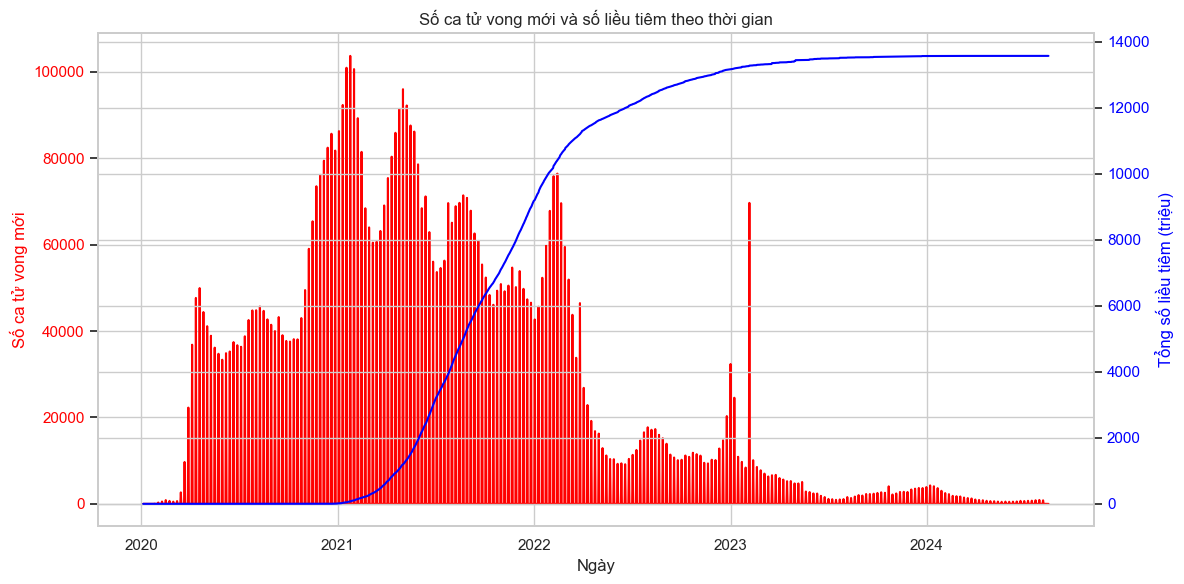

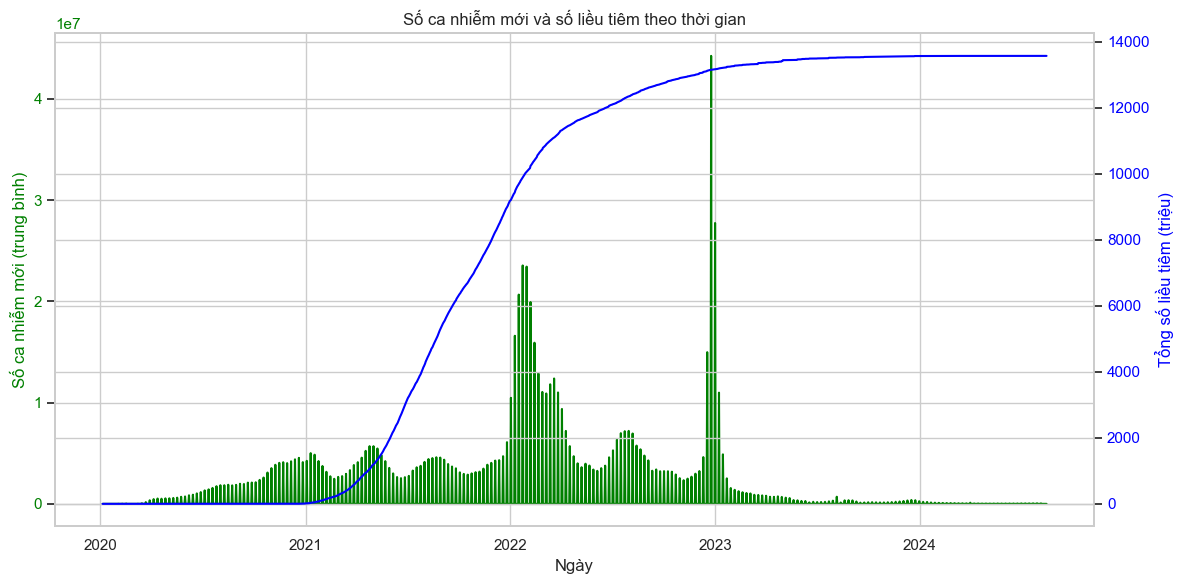

In [108]:
import matplotlib.pyplot as plt

# Nhóm dữ liệu theo ngày và tính tổng các giá trị
time_vaccine_cases = world_data.groupby('date').sum()

# Vẽ biểu đồ với hai trục Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục Y thứ nhất - Số ca tử vong mới
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Số ca tử vong mới', color='red')  
ax1.plot(
    time_vaccine_cases.index, 
    time_vaccine_cases['new_deaths'], 
    label='Số ca tử vong mới', 
    color='red'
)
ax1.tick_params(axis='y', labelcolor='red')  

# Trục Y thứ hai - Số liều tiêm
ax2 = ax1.twinx()
ax2.set_ylabel('Tổng số liều tiêm (triệu)', color='blue')
ax2.plot(
    time_vaccine_cases.index, 
    time_vaccine_cases['total_vaccinations'] / 1e6, 
    label='Tổng số liều tiêm (triệu)', 
    color='blue'
)
ax2.tick_params(axis='y', labelcolor='blue')

# Thêm tiêu đề cho biểu đồ
plt.title('Số ca tử vong mới và số liều tiêm theo thời gian')

# Điều chỉnh layout cho biểu đồ đẹp mắt hơn
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()

# Vẽ biểu đồ thứ hai với số ca nhiễm mới và số liều tiêm
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục Y thứ nhất - Số ca nhiễm mới
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Số ca nhiễm mới (trung bình)', color='green')
ax1.plot(time_vaccine_cases.index, time_vaccine_cases['new_cases'], label='Số ca nhiễm mới (trung bình)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Trục Y thứ hai - Số liều tiêm
ax2 = ax1.twinx()
ax2.set_ylabel('Tổng số liều tiêm (triệu)', color='blue')
ax2.plot(
    time_vaccine_cases.index, 
    time_vaccine_cases['total_vaccinations'] / 1e6, 
    label='Tổng số liều tiêm (triệu)', 
    color='blue'
)
ax2.tick_params(axis='y', labelcolor='blue')

# Thêm tiêu đề cho biểu đồ
plt.title('Số ca nhiễm mới và số liều tiêm theo thời gian')

# Điều chỉnh layout và hiển thị biểu đồ
fig.tight_layout()
plt.show()


### Tương quan ca nhiễm và hồi phục

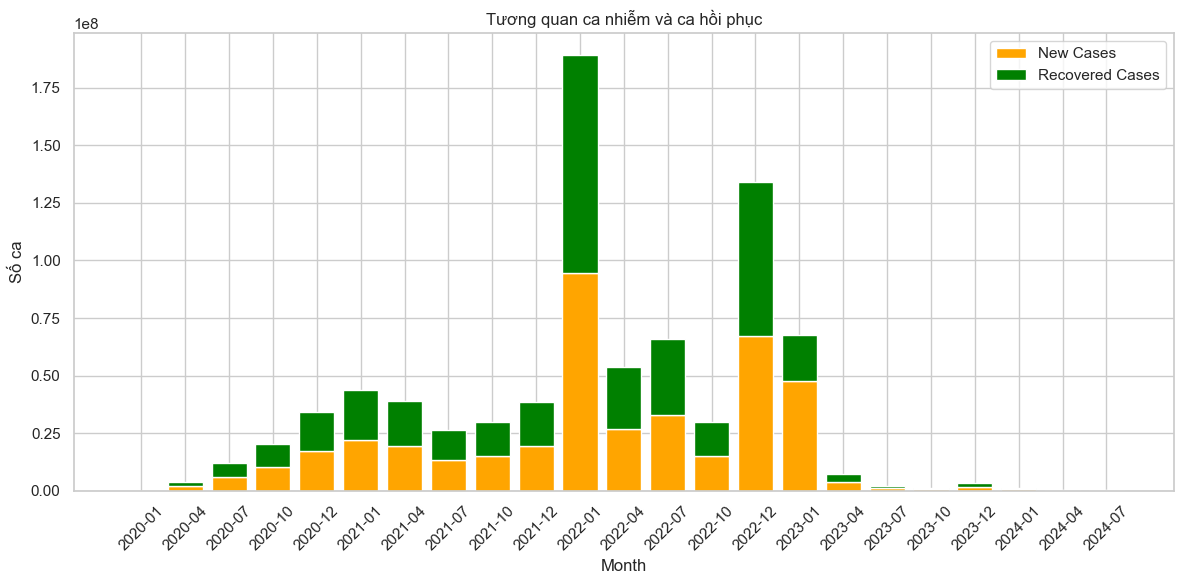

In [102]:

World_data["month"] = World_data["date"].dt.to_period("M")
# Lấy giá trị đầu và cuối tháng cho total_cases và total_deaths
monthly_summary = World_data.groupby("month").agg(
    total_cases_start=("total_cases", "first"),
    total_cases_end=("total_cases", "last"),
    total_deaths_start=("total_deaths", "first"),
    total_deaths_end=("total_deaths", "last"),
    new_cases=("new_cases", "sum")
).reset_index()
# Tính số ca hồi phục trong tháng
monthly_summary["recovered_in_month"] = (
    (monthly_summary["total_cases_end"] - monthly_summary["total_deaths_end"]) -
    (monthly_summary["total_cases_start"] - monthly_summary["total_deaths_start"])
)
# Đảm bảo không có giá trị âm
monthly_summary["recovered_in_month"] = monthly_summary["recovered_in_month"].clip(lower=0)
monthly_summary["new_cases"] = monthly_summary["new_cases"].clip(lower=0)
# Lấy danh sách các tháng đại diện cho quý
quarters = ["01", "04", "07", "10", "12"]
monthly_summary["month_str"] = monthly_summary["month"].astype(str)
filtered_months = monthly_summary[monthly_summary["month_str"].str[-2:].isin(quarters)]

plt.figure(figsize=(12, 6))

# Biểu đồ stacked bar
plt.bar(filtered_months["month_str"], filtered_months["new_cases"], label="New Cases", color="orange")
plt.bar(filtered_months["month_str"], filtered_months["recovered_in_month"], 
        bottom=filtered_months["new_cases"], label="Recovered Cases", color="green")

plt.title("Tương quan ca nhiễm và ca hồi phục")
plt.xlabel("Month")
plt.ylabel("Số ca")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Kiểm định giả thiết, tính phương sai , dự đoán

### Các biện pháp cách ly xã hội ảnh hưởng đến số ca nhiễm và tử vong

In [103]:
import pandas as pd
from scipy.stats import ttest_rel

# Chọn ngày triển khai chính sách (thay đổi theo nhu cầu)
policy_date = "2020-03-01"
policy_date = pd.to_datetime(policy_date)  # Chuyển sang datetime

# Chia dữ liệu thành hai nhóm: trước và sau chính sách
before_policy = World_data[World_data['date'] < policy_date]
after_policy = World_data[World_data['date'] >= policy_date]
# Đảm bảo hai nhóm có cùng số lượng mẫu
min_samples = min(len(before_policy), len(after_policy))
before_cases = before_policy['new_cases'].iloc[:min_samples]
after_cases = after_policy['new_cases'].iloc[:min_samples]
before_deaths = before_policy['new_deaths'].iloc[:min_samples]
after_deaths = after_policy['new_deaths'].iloc[:min_samples]
# Kiểm định T-Test ghép cặp cho số ca nhiễm mới
ttest_cases_stat, ttest_cases_p = ttest_rel(before_cases, after_cases)
# Kiểm định T-Test ghép cặp cho số ca tử vong mới
ttest_deaths_stat, ttest_deaths_p = ttest_rel(before_deaths, after_deaths)

print("**Kết quả kiểm định T-Test (Paired Samples)**\n")

print("Số ca nhiễm mới:")
print(f"T-statistic: {ttest_cases_stat:.2f}, P-value: {ttest_cases_p:.4f}")
if ttest_cases_p < 0.05:
    print("➡️ Có sự khác biệt có ý nghĩa thống kê về số ca nhiễm mới trước và sau chính sách.")
else:
    print("➡️ Không có sự khác biệt có ý nghĩa thống kê về số ca nhiễm mới trước và sau chính sách.")

print("\nSố ca tử vong mới:")
print(f"T-statistic: {ttest_deaths_stat:.2f}, P-value: {ttest_deaths_p:.4f}")
if ttest_deaths_p < 0.05:
    print("➡️ Có sự khác biệt có ý nghĩa thống kê về số ca tử vong mới trước và sau chính sách.")
else:
    print("➡️ Không có sự khác biệt có ý nghĩa thống kê về số ca tử vong mới trước và sau chính sách.")


**Kết quả kiểm định T-Test (Paired Samples)**

Số ca nhiễm mới:
T-statistic: -2.31, P-value: 0.0248
➡️ Có sự khác biệt có ý nghĩa thống kê về số ca nhiễm mới trước và sau chính sách.

Số ca tử vong mới:
T-statistic: -2.14, P-value: 0.0365
➡️ Có sự khác biệt có ý nghĩa thống kê về số ca tử vong mới trước và sau chính sách.


### Tiêm chủng ảnh hưởng đến số ca nhiễm và tử vong

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
#  Nhập ngưỡng tiêm vaccine
try:
    vaccination_threshold = float(input("Nhập ngưỡng tỷ lệ tiêm vaccine (0-100): "))
    if not (0 <= vaccination_threshold <= 100):
        raise ValueError("Tỷ lệ phải nằm trong khoảng từ 0 đến 100.")
except ValueError as e:
    print(f"Lỗi: {e}")
    exit()
#  Chia dữ liệu thành hai nhóm: trước và sau khi tiêm vaccine
pre_vaccination = World_data[World_data['people_fully_vaccinated_per_hundred'] < vaccination_threshold]
post_vaccination = World_data[World_data['people_fully_vaccinated_per_hundred'] >= vaccination_threshold]
#  T-test: So sánh số ca nhiễm trước và sau khi tiêm vaccine
t_stat_cases, p_value_cases = ttest_ind(
    pre_vaccination['new_cases'],
    post_vaccination['new_cases'],
    equal_var=False
)
t_stat_deaths, p_value_deaths = ttest_ind(
    pre_vaccination['new_deaths'],
    post_vaccination['new_deaths'],
    equal_var=False
)
#  Hiển thị kết quả kiểm định T-test
print("\n**Kết quả kiểm định T-test:**\n")
# Kết quả kiểm định số ca nhiễm
print(f"T-test số ca nhiễm - T-statistic: {t_stat_cases:.2f}, P-value: {p_value_cases:.4f}")
if p_value_cases < 0.05:
    print("➡️ Có sự khác biệt có ý nghĩa thống kê về số ca nhiễm trước và sau khi tiêm vaccine.")
else:
    print("➡️ Không có sự khác biệt có ý nghĩa thống kê về số ca nhiễm trước và sau khi tiêm vaccine.")
# Kết quả kiểm định số ca tử vong
print(f"T-test số ca tử vong - T-statistic: {t_stat_deaths:.2f}, P-value: {p_value_deaths:.4f}")
if p_value_deaths < 0.05:
    print("➡️ Có sự khác biệt có ý nghĩa thống kê về số ca tử vong trước và sau khi tiêm vaccine.")
else:
    print("➡️ Không có sự khác biệt có ý nghĩa thống kê về số ca tử vong trước và sau khi tiêm vaccine.")



**Kết quả kiểm định T-test:**

T-test số ca nhiễm - T-statistic: -1.70, P-value: 0.0893
➡️ Không có sự khác biệt có ý nghĩa thống kê về số ca nhiễm trước và sau khi tiêm vaccine.
T-test số ca tử vong - T-statistic: 5.91, P-value: 0.0000
➡️ Có sự khác biệt có ý nghĩa thống kê về số ca tử vong trước và sau khi tiêm vaccine.


### Ảnh hưởng của các biến chủng đến số ca nhiễm và tử vong

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Lọc dữ liệu cho biến chủng Delta (từ tháng 5/2021 đến tháng 12/2021)
delta_wave = World_data[
    (World_data['date'] >= '2021-05-01') & (World_data['date'] <= '2021-12-31')
]

# Lọc dữ liệu cho biến chủng Omicron (từ tháng 12/2021 đến giữa năm 2022)
omicron_wave = World_data[
    (World_data['date'] >= '2021-12-01') & (World_data['date'] <= '2022-06-30')
]
# Thực hiện ANOVA cho số ca nhiễm mới
anova_cases = f_oneway(delta_wave['new_cases'], omicron_wave['new_cases'])
#  Thực hiện ANOVA cho số ca tử vong mới
anova_deaths = f_oneway(delta_wave['new_deaths'], omicron_wave['new_deaths'])
print("**Kết quả kiểm định ANOVA**\n")
print("ANOVA - Số ca nhiễm mới:")
print(f"F-statistic: {anova_cases.statistic:.2f}, P-value: {anova_cases.pvalue:.4f}")
if anova_cases.pvalue < 0.05:
    print("➡️ Có sự khác biệt có ý nghĩa thống kê về số ca nhiễm mới giữa hai biến chủng.")
else:
    print("➡️ Không có sự khác biệt có ý nghĩa thống kê về số ca nhiễm mới giữa hai biến chủng.")
print("\nANOVA - Số ca tử vong mới:")
print(f"F-statistic: {anova_deaths.statistic:.2f}, P-value: {anova_deaths.pvalue:.4f}")
if anova_deaths.pvalue < 0.05:
    print("➡️ Có sự khác biệt có ý nghĩa thống kê về số ca tử vong mới giữa hai biến chủng.")
else:
    print("➡️ Không có sự khác biệt có ý nghĩa thống kê về số ca tử vong mới giữa hai biến chủng.")


**Kết quả kiểm định ANOVA**

ANOVA - Số ca nhiễm mới:
F-statistic: 7.95, P-value: 0.0050
➡️ Có sự khác biệt có ý nghĩa thống kê về số ca nhiễm mới giữa hai biến chủng.

ANOVA - Số ca tử vong mới:
F-statistic: 4.01, P-value: 0.0458
➡️ Có sự khác biệt có ý nghĩa thống kê về số ca tử vong mới giữa hai biến chủng.


### Dự đoán số ca nhiễm và tử vong bằng hồi quy tuyến tính

a:\VScode\Python\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

a:\VScode\Python\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



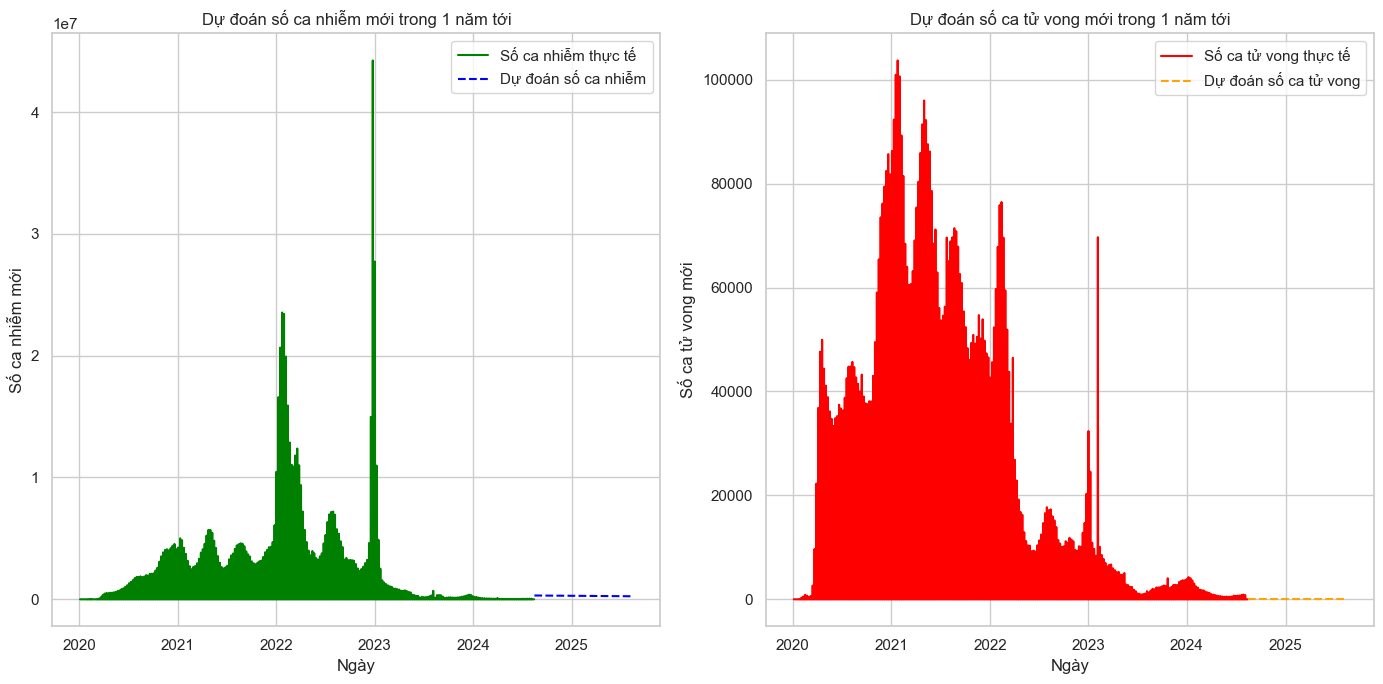

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# tạo dữ liệu
world_data =World_data.copy()
# Chuyển cột 'date' sang định dạng datetime
world_data['date'] = pd.to_datetime(world_data['date'])

# Tính số ngày kể từ ngày đầu tiên trong dữ liệu
world_data['days_since_start'] = (world_data['date'] - world_data['date'].min()).dt.days

# Xử lý giá trị thiếu (NaN) bằng cách thay bằng 0
world_data['new_cases'] = world_data['new_cases'].fillna(0)
world_data['new_deaths'] = world_data['new_deaths'].fillna(0)

# Chuẩn bị dữ liệu cho hồi quy tuyến tính
X = world_data[['days_since_start']]  # Biến độc lập
y_cases = world_data['new_cases']    # Biến phụ thuộc (số ca nhiễm mới)
y_deaths = world_data['new_deaths']  # Biến phụ thuộc (số ca tử vong mới)

# Mô hình hồi quy tuyến tính cho số ca nhiễm
regressor_cases = LinearRegression()
regressor_cases.fit(X, y_cases)

# Dự đoán số ca nhiễm cho 365 ngày tới
future_days = np.arange(X['days_since_start'].max() + 1, X['days_since_start'].max() + 366).reshape(-1, 1)
future_cases = regressor_cases.predict(future_days)
future_cases = np.maximum(future_cases, 0)  # Đảm bảo không có giá trị âm

# Mô hình hồi quy tuyến tính cho số ca tử vong
regressor_deaths = LinearRegression()
regressor_deaths.fit(X, y_deaths)

# Dự đoán số ca tử vong cho 365 ngày tới
future_deaths = regressor_deaths.predict(future_days)
future_deaths = np.maximum(future_deaths, 0)  # Đảm bảo không có giá trị âm

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

# Biểu đồ dự đoán số ca nhiễm
plt.subplot(1, 2, 1)
plt.plot(world_data['date'], world_data['new_cases'], label='Số ca nhiễm thực tế', color='green')
plt.plot(world_data['date'].min() + pd.to_timedelta(future_days.flatten(), unit='D'), 
         future_cases, label='Dự đoán số ca nhiễm', color='blue', linestyle='--')
plt.title('Dự đoán số ca nhiễm mới trong 1 năm tới')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.legend()

# Biểu đồ dự đoán số ca tử vong
plt.subplot(1, 2, 2)
plt.plot(world_data['date'], world_data['new_deaths'], label='Số ca tử vong thực tế', color='red')
plt.plot(world_data['date'].min() + pd.to_timedelta(future_days.flatten(), unit='D'), 
         future_deaths, label='Dự đoán số ca tử vong', color='orange', linestyle='--')
plt.title('Dự đoán số ca tử vong mới trong 1 năm tới')
plt.xlabel('Ngày')
plt.ylabel('Số ca tử vong mới')
plt.legend()
plt.tight_layout()
plt.show()


# Ảnh hưởng của covid 19 lên các lĩnh vực khác

### Kinh tế (GDP ) các quốc gia trong quý 2 2020

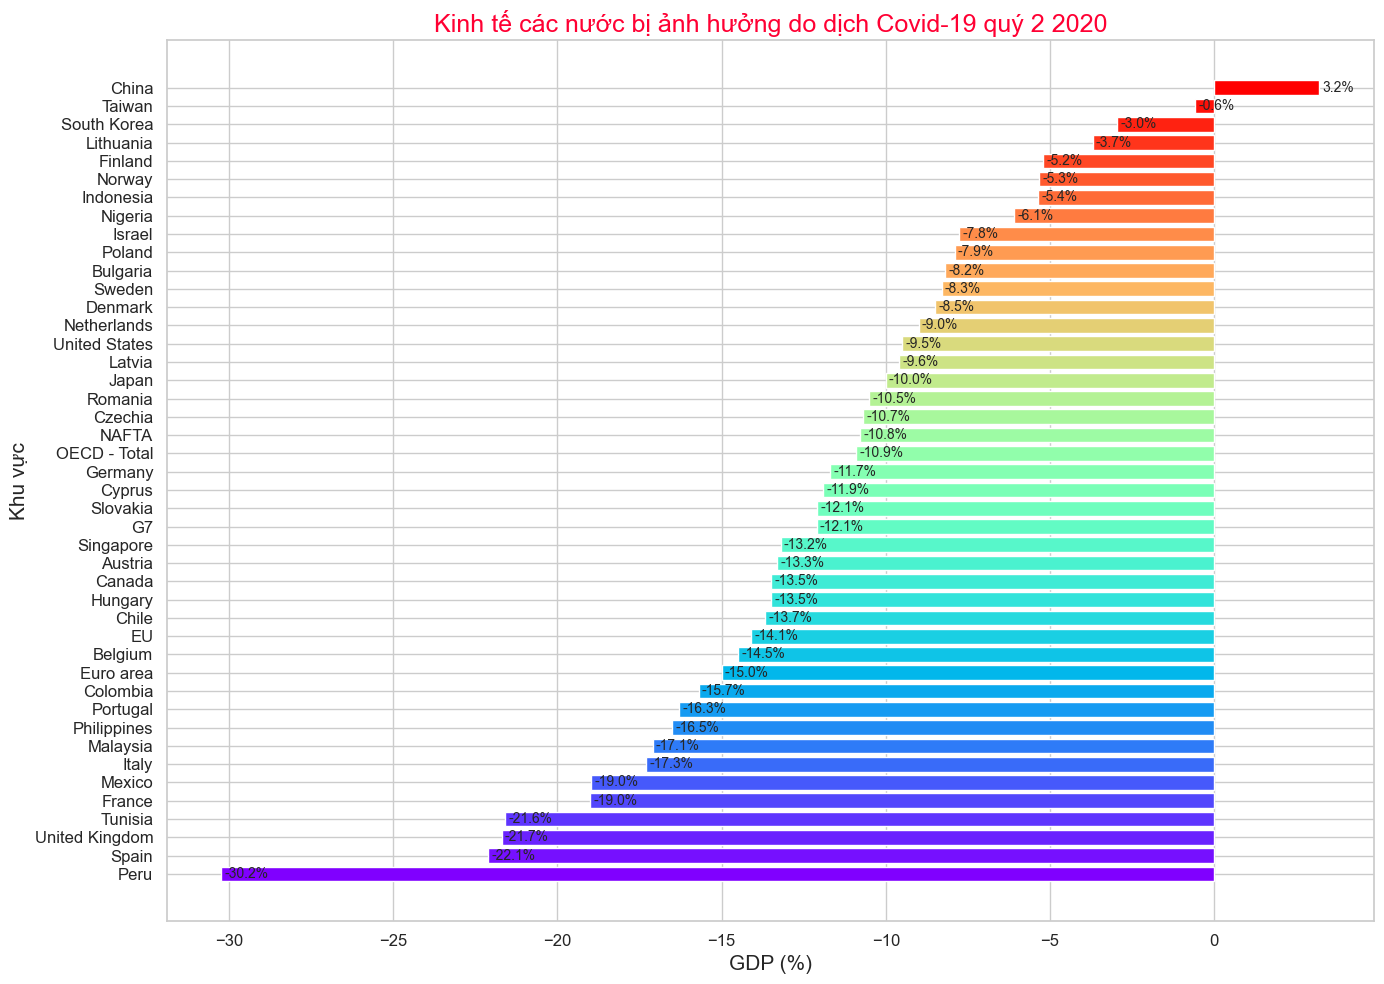

In [ ]:
# kinh tế các quốc gia phát triển trong quý 2 2020
from matplotlib.cm import rainbow
gdp1=pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\gdp1.csv')
data_economic = gdp1[["Entity","GDP growth from previous year, 2020 Q2"]]
data_economic = data_economic.sort_values(by="GDP growth from previous year, 2020 Q2",ascending=True)
colors = rainbow(np.linspace(0, 1, len(data_economic)))

plt.figure(figsize=(14, 10), dpi=100, facecolor='white') 

bars = plt.barh(data_economic["Entity"], data_economic["GDP growth from previous year, 2020 Q2"], color=colors)
plt.xlabel("GDP (%)", fontsize=15)
plt.ylabel("Khu vực", fontsize=15)
plt.tick_params(axis="y",labelsize=12)
plt.tick_params(axis="x", labelsize=12)
plt.title(
    "Kinh tế các nước bị ảnh hưởng do dịch Covid-19 quý 2 2020",
    fontsize=18,
    color="#FF0033",
)
for bar in bars:
    plt.text(
        bar.get_width() + 0.1,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.1f}%",
        va="center",
        ha="left",
        fontsize=10,
    )
plt.tight_layout()
plt.show()

### Dữ liệu các chuyến đi trong những covid19

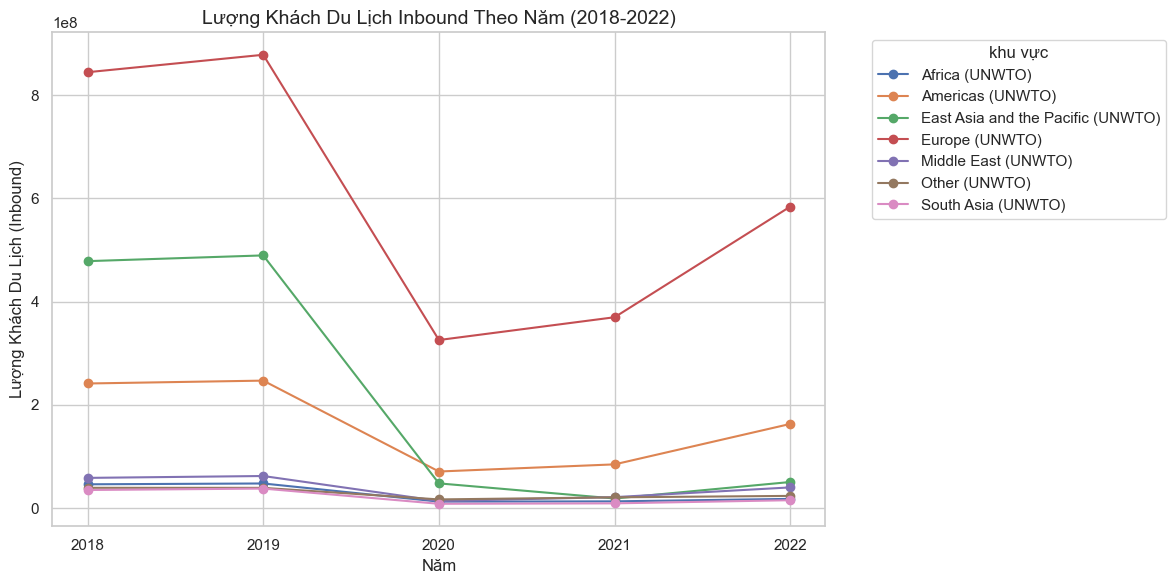

In [ ]:
# ảnh hưởng đến ngành giao thông du lịch dịch vụ

travel=pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\travel.csv')
df_filtered =travel[(travel['Year'] >= 2018) & (travel['Year'] <= 2022)]

plt.figure(figsize=(12, 6))
for entity in df_filtered['Entity'].unique():
    entity_data = df_filtered[df_filtered['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['inbound_tourism_by_region'], marker='o', label=entity)
plt.title('Lượng Khách Du Lịch Inbound Theo Năm (2018-2022)', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Lượng Khách Du Lịch (Inbound)', fontsize=12)
plt.xticks(df_filtered['Year'].unique())
plt.legend(title="khu vực", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### GDP và tỉ lệ thất nghiệp tương quan với số ca nhiễm 

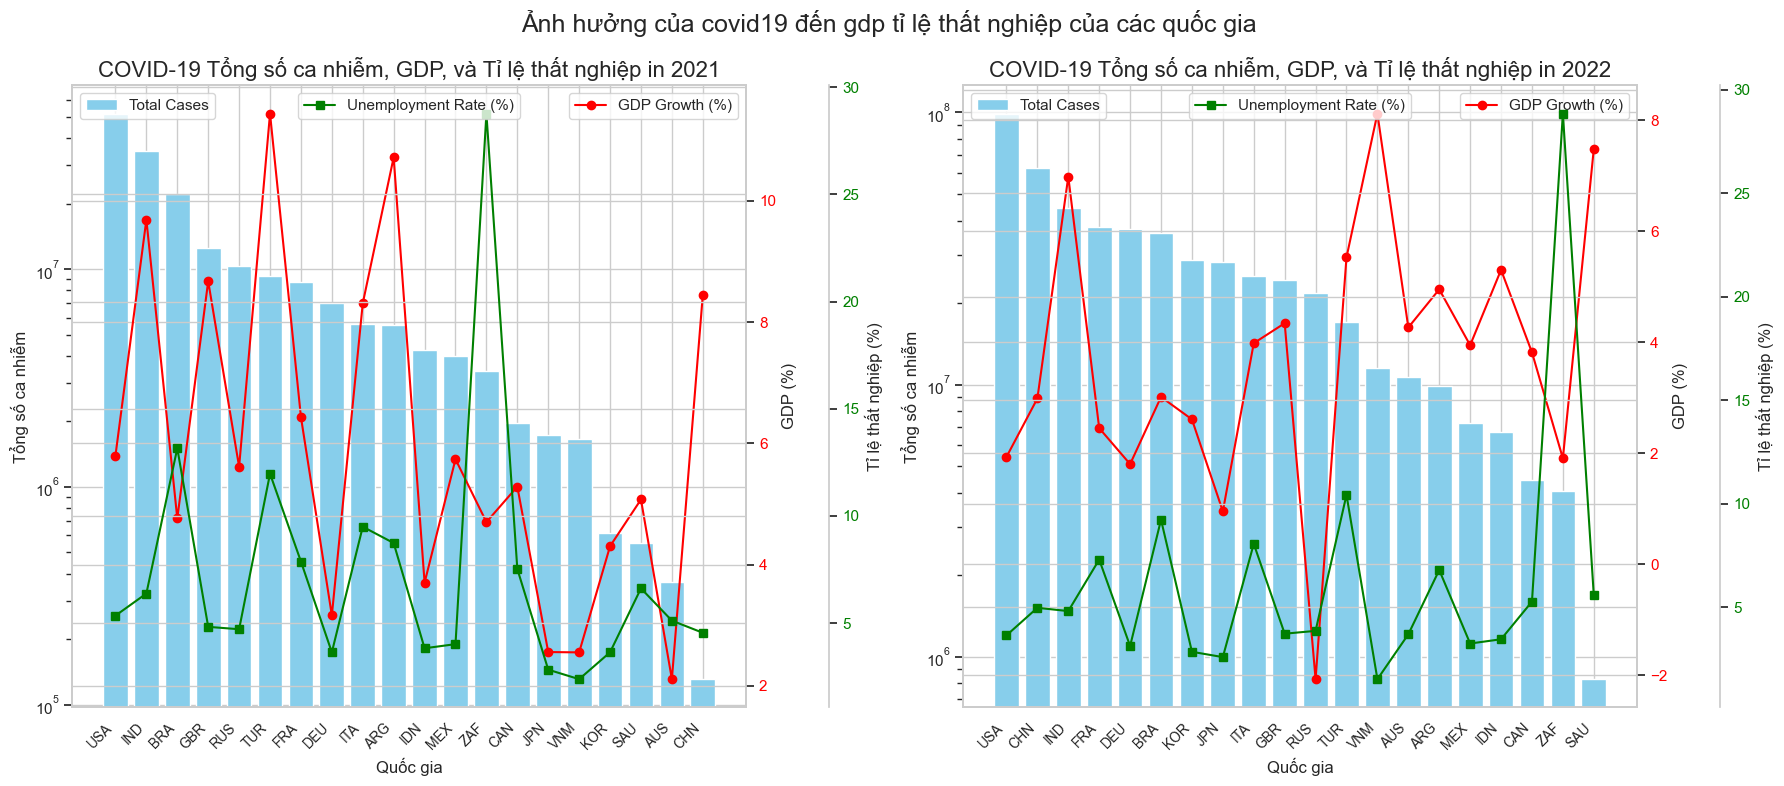

In [ ]:

covid_data = country_data.copy()
mapping = {
    'AR': 'ARG', 'AU': 'AUS', 'BR': 'BRA', 'CA': 'CAN', 'CN': 'CHN', 'DE': 'DEU',
    'EU': 'EU', 'FR': 'FRA', 'GB': 'GBR', 'ID': 'IDN', 'IN': 'IND', 'IT': 'ITA',
    'JP': 'JPN', 'KR': 'KOR', 'MX': 'MEX', 'RU': 'RUS', 'SA': 'SAU', 'TR': 'TUR',
    'US': 'USA', 'VN': 'VNM', 'ZA': 'ZAF'
}
gdp_data['iso_code'] = gdp_data['Country'].map(mapping)

def prepare_data(year):
    gdp_unemployment = gdp_data[gdp_data['Year'] == year][['iso_code', 'GDP Growth (%)', 'Unemployment Rate (%)']]
    covid_year = covid_data[covid_data['date'] <= f'{year}-12-31']
    total_cases = covid_year.groupby('iso_code')['total_cases'].max().reset_index().rename(columns={'total_cases': 'Total Cases'})
    merged_data = total_cases.merge(gdp_unemployment, on='iso_code', how='inner').sort_values(by='Total Cases', ascending=False)
    return merged_data

merged_data_2021 = prepare_data(2021)
merged_data_2022 = prepare_data(2022)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

def plot_data(ax, data, title):
    ax.bar(data['iso_code'], data['Total Cases'], color='skyblue', label='Total Cases')
    ax.set_xlabel('Quốc gia', fontsize=12)
    ax.set_ylabel('Tổng số ca nhiễm', fontsize=12)
    ax.set_yscale('log')
    ax.set_xticks(np.arange(len(data['iso_code'])))
    ax.set_xticklabels(data['iso_code'], rotation=45, ha='right', fontsize=10)
    ax.set_title(title, fontsize=16)

    # Biểu đồ đường (GDP Growth)
    ax2 = ax.twinx()
    ax2.plot(data['iso_code'], data['GDP Growth (%)'], color='red', marker='o', label='GDP Growth (%)')
    ax2.set_ylabel('GDP (%)', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')

    # Biểu đồ đường (Unemployment Rate)
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(data['iso_code'], data['Unemployment Rate (%)'], color='green', marker='s', label='Unemployment Rate (%)')
    ax3.set_ylabel('Tỉ lệ thất nghiệp (%)', fontsize=12)
    ax3.tick_params(axis='y', labelcolor='green')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax3.legend(loc='upper center')
plot_data(ax1, merged_data_2021, 'COVID-19 Tổng số ca nhiễm, GDP, và Tỉ lệ thất nghiệp in 2021')
plot_data(ax2, merged_data_2022, 'COVID-19 Tổng số ca nhiễm, GDP, và Tỉ lệ thất nghiệp in 2022')
fig.suptitle('Ảnh hưởng của covid19 đến gdp tỉ lệ thất nghiệp của các quốc gia ', fontsize=18)
plt.tight_layout()
plt.show()


### Tín hiệu tích cực đến từ covid19 về lượng khí co2 

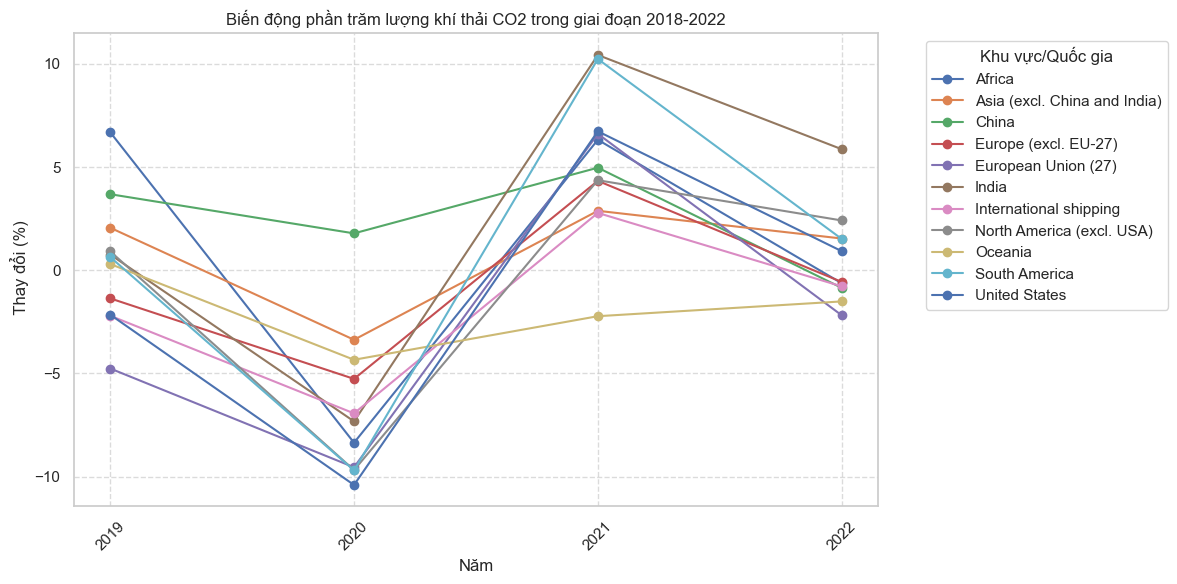

In [ ]:


data = pd.read_csv(r"A:\UET-VNU\Covid19_KNK\Datacovid19\annual-co-emissions-by-region (1).csv")

# Loại bỏ các entity "International Aviation"
# Lọc dữ liệu từ năm 2018 đến 2022
data = data[~data["Entity"].isin(["International aviation"])]
data_f = data[(data["Year"] >= 2018) & (data["Year"] <= 2022)]
regions = data_f["Entity"].unique()
lst = []

for region in regions:
    region_data = data_f[data_f["Entity"] == region]
    region_data = region_data.sort_values(by="Year")
    region_data["% Change"] = region_data["Annual CO₂ emissions"].pct_change() * 100
    lst.append(region_data)
# Kết hợp tất cả dữ liệu sau tính toán
lst = pd.concat(lst)
# Tạo các năm chuyển đổi 
lst["Change"] = (
     (lst["Year"] ).astype(str)
)
# Lọc dữ liệu chỉ tính toán năm tiếp theo
lst = lst.dropna(subset=["% Change"])
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
for region in regions:
    region_data = lst[lst["Entity"] == region]
    plt.plot(
        region_data["Change"],
        region_data["% Change"],
        label=region,
        marker="o"
    )

plt.title("Biến động phần trăm lượng khí thải CO2 trong giai đoạn 2018-2022")
plt.xlabel("Năm")
plt.ylabel(" Thay đổi (%)")
plt.xticks(rotation=45)
plt.legend(title="Khu vực/Quốc gia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
